In [1]:
import warnings
import numpy as np
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'png' #retina
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr
from IPython.display import display
pd.options.display.max_columns = None
import missingno as msno

In [2]:
df = pd.read_csv("cs1_part1_res.csv")

In [3]:
df.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,12.278398
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,11.561725
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,12.055256
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,12.404928
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,12.154258


<AxesSubplot:>

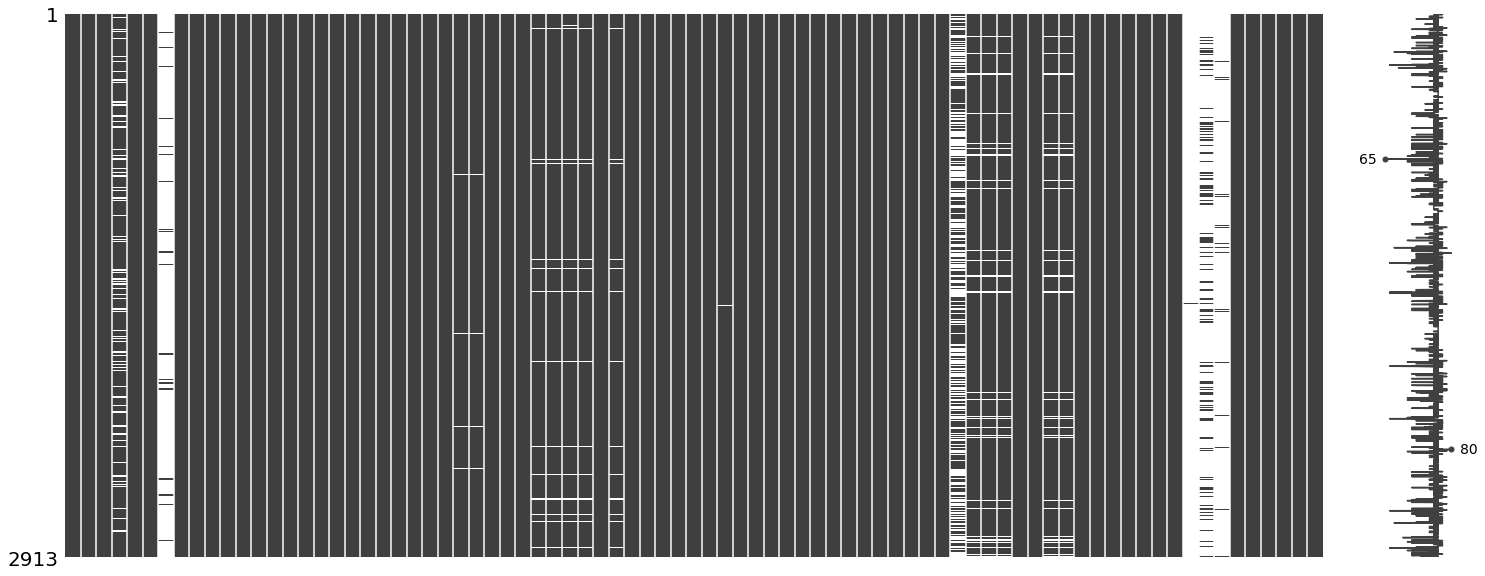

In [4]:
#visualize missing data
msno.matrix(df)

In [5]:
print("df size is : {}".format(df.shape))
missingdf = (df.isnull().sum() / len(df)) * 100
missingdf = missingdf.drop(missingdf[missingdf == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :missingdf})
missing_data.head(20)

df size is : (2913, 81)


,Missing Ratio
pool_qc,99.622382
misc_feature,96.429797
alley,93.237212
fence,80.466873
fireplace_qu,48.712667
lot_frontage,16.752489
garage_yr_blt,5.458290
garage_cond,5.458290
garage_qual,5.458290
garage_finish,5.458290


# remove unnecessary features

In [6]:
#remove the column PID, not usefull features
df = df.drop("pid",axis=1)

In [7]:
#remove utilities because the data mostly is the same only 3 entry is different
df = df.drop(['utilities'], axis=1)

# input missing values

is added based on the description notes

<AxesSubplot:>

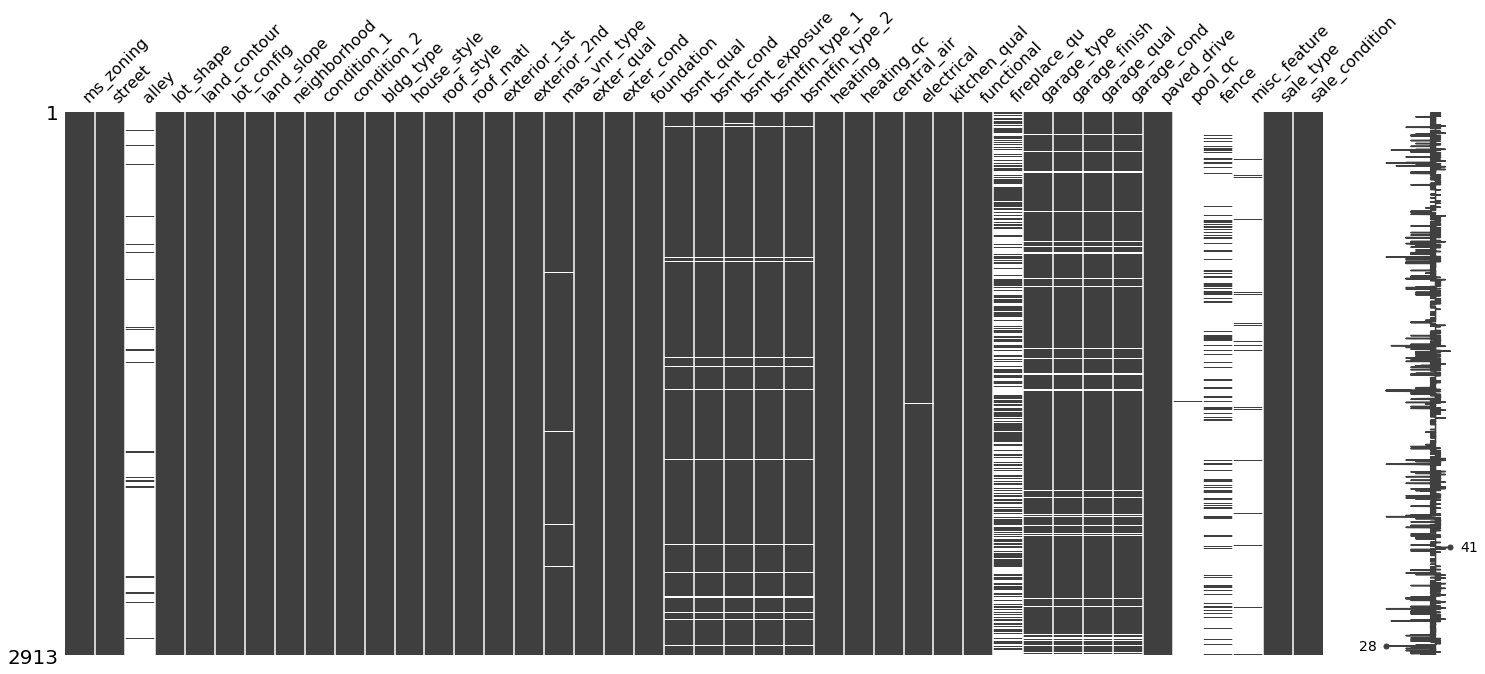

In [8]:
msno.matrix(df.select_dtypes(include='object'))

In [9]:
#object type
df_objs = df.select_dtypes(include='object')
df_objs

,ms_zoning,street,alley,lot_shape,land_contour,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type,sale_condition
0,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,Plywood,Stone,TA,TA,CBlock,TA,Gd,Gd,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,Gd,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,RL,Pave,NaN,IR1,Lvl,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,GdPrv,NaN,WD,Normal
2909,RL,Pave,NaN,IR1,Low,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,BLQ,ALQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2910,RL,Pave,NaN,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal
2911,RL,Pave,NaN,Reg,Lvl,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,Gd,TA,Av,ALQ,LwQ,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [10]:
#i try to group them up into clusters with same values

#values "none"
for col in ('pool_qc','misc_feature','garage_type','alley','fence','fireplace_qu','garage_finish', 'garage_qual', 'garage_cond','mas_vnr_type','ms_subclass'):
    df[col] = df[col].fillna('None')

In [11]:
# For below categorical basement-related features, NaN means that there is no basement.
for col in ('bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2'):
    df[col] = df[col].fillna('None')

In [12]:
#MSZoning classification : 'RL' is common
df['ms_zoning'] = df['ms_zoning'].fillna(df['ms_zoning'].fillna("RL"))

In [13]:
df["functional"] = df["functional"].fillna("Typ")

In [14]:
# Electrical standard  = SBrkr
df['electrical'] = df['electrical'].fillna(df['electrical'].fillna("SBrkr"))

In [15]:
# KitchenQual
df['kitchen_qual'] = df['kitchen_qual'].fillna(df['kitchen_qual'].fillna("TA"))

In [16]:
# Exterior1st and Exterior2nd
df['exterior_1st'] = df['exterior_1st'].fillna(df['exterior_1st'].fillna('Other'))
df['exterior_2nd'] = df['exterior_2nd'].fillna(df['exterior_2nd'].fillna('Other'))

In [17]:
#SaleType
df['sale_type'] = df['sale_type'].fillna(df['sale_type'].fillna('Oth'))

<AxesSubplot:>

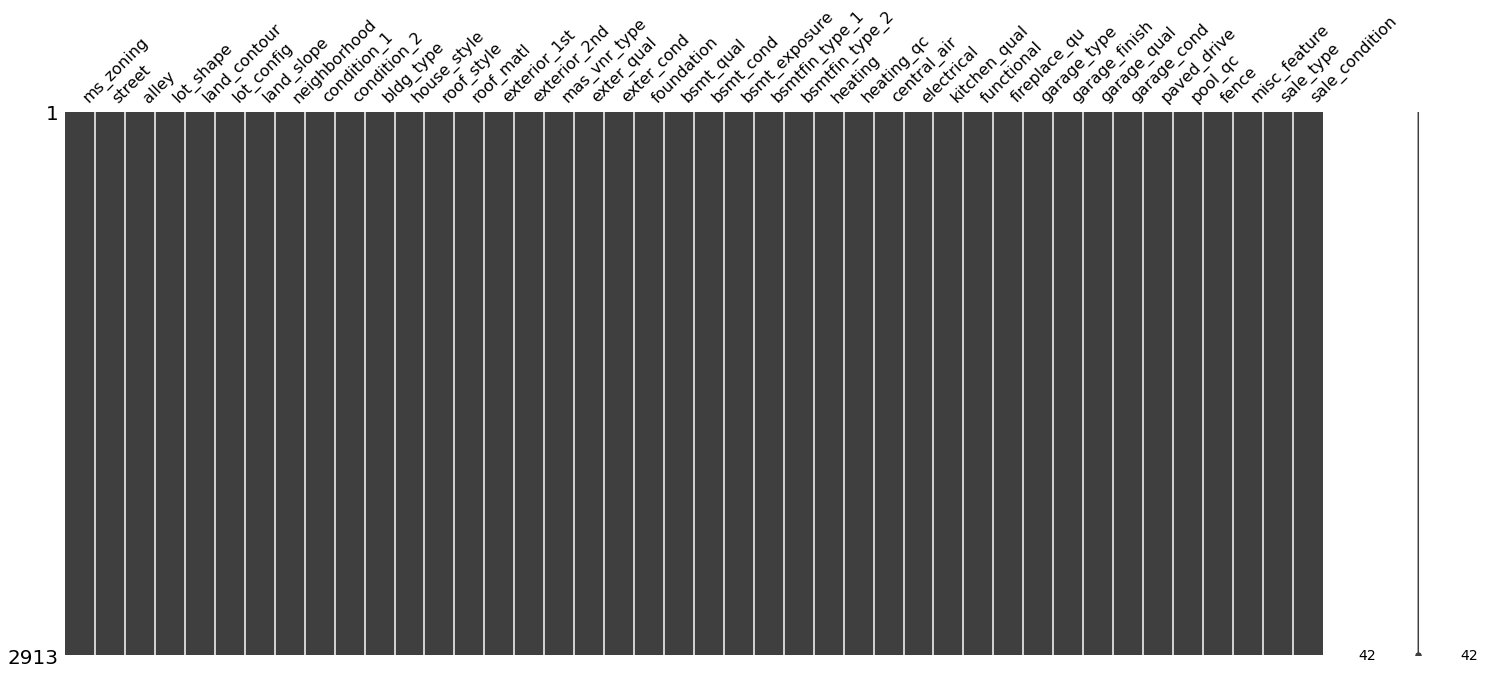

In [18]:
msno.matrix(df.select_dtypes(include='object'))

In [19]:
#integer type
df_objs = df.select_dtypes(exclude='object')
df_objs

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,12.278398
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,11.561725
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,12.055256
3,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,12.404928
4,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,12.154258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,80,37.0,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,1003.0,1003,0,0,1003,1.0,0.0,1,0,3,1,6,0,1984.0,2.0,588.0,120,0,0,0,0,0,0,3,2006,11.867104
2909,20,NaN,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,864.0,902,0,0,902,1.0,0.0,1,0,2,1,5,0,1983.0,2.0,484.0,164,0,0,0,0,0,0,6,2006,11.782960
2910,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,11.790565
2911,20,77.0,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,1389.0,1389,0,0,1389,1.0,0.0,1,0,2,1,6,1,1975.0,2.0,418.0,240,38,0,0,0,0,0,4,2006,12.043560


<AxesSubplot:>

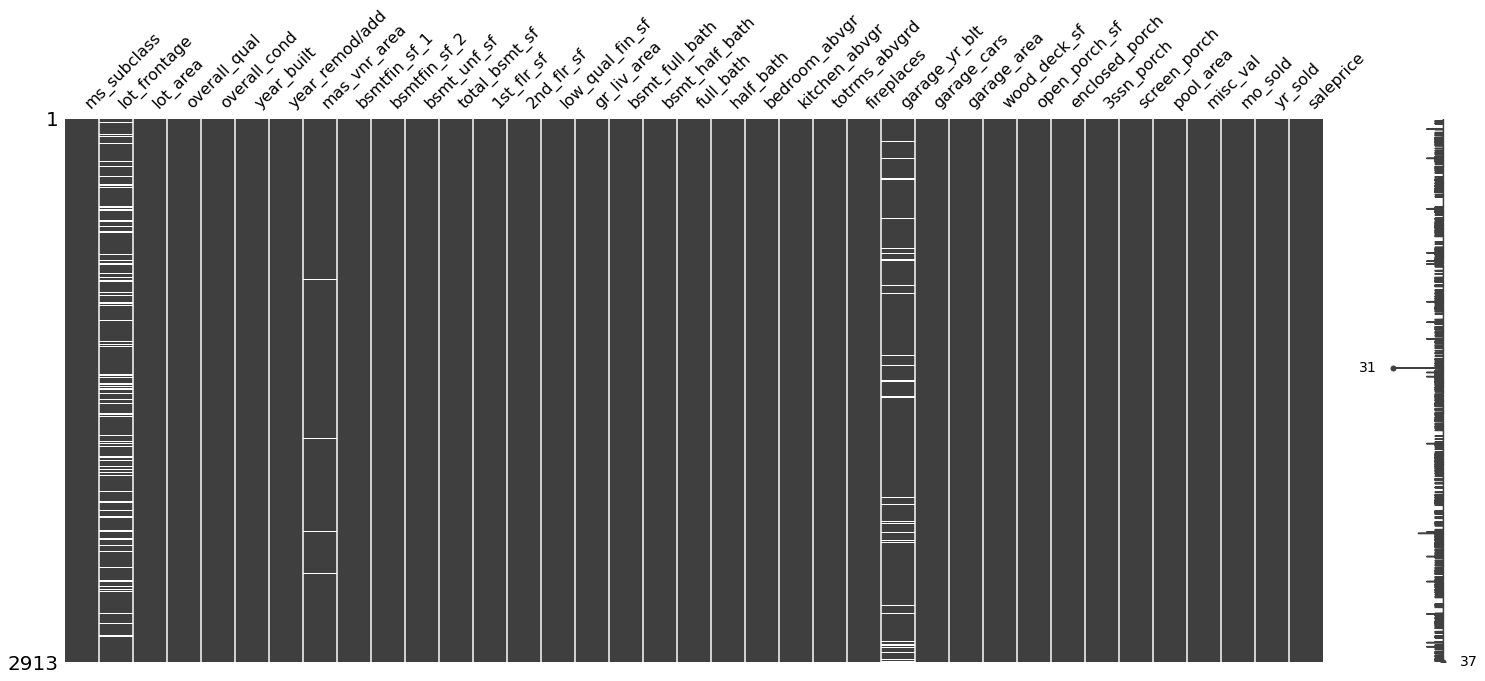

In [20]:
msno.matrix(df.select_dtypes(exclude='object'))

In [21]:
# Replacing missing data with 0 (Since No garage = no cars in such garage).
for col in ('garage_yr_blt', 'garage_area', 'garage_cars'):
    df[col] = df[col].fillna(0)

In [22]:
# missing values are likely zero for having no basement 
for col in ('bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf','total_bsmt_sf', 'bsmt_full_bath', 'bsmt_half_bath'):
    df[col] = df[col].fillna(0)

In [23]:
df["mas_vnr_area"] = df["mas_vnr_area"].fillna(0)

In [24]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
df["lot_frontage"] = df.groupby("neighborhood")["lot_frontage"].transform(lambda x: x.fillna(x.median()))

In [25]:
#there are still missing values for lot_frontage
#fill it with median
df["lot_frontage"] = df["lot_frontage"].fillna(df['lot_frontage'].median())

# some numeric are actually categorical

In [26]:
#dang need run this everytime i imported from csv...cos evertime imported in the astype changed back
# Transforming required numerical features to categorical

df['ms_subclass'] = df['ms_subclass'].astype(str)
df['overall_cond'] = df['overall_cond'].astype(str)
df['yr_sold'] = df['yr_sold'].astype(str)
df['mo_sold'] = df['mo_sold'].astype(str)

In [27]:
df['lot_frontage'].isnull().values.any()

False

<AxesSubplot:>

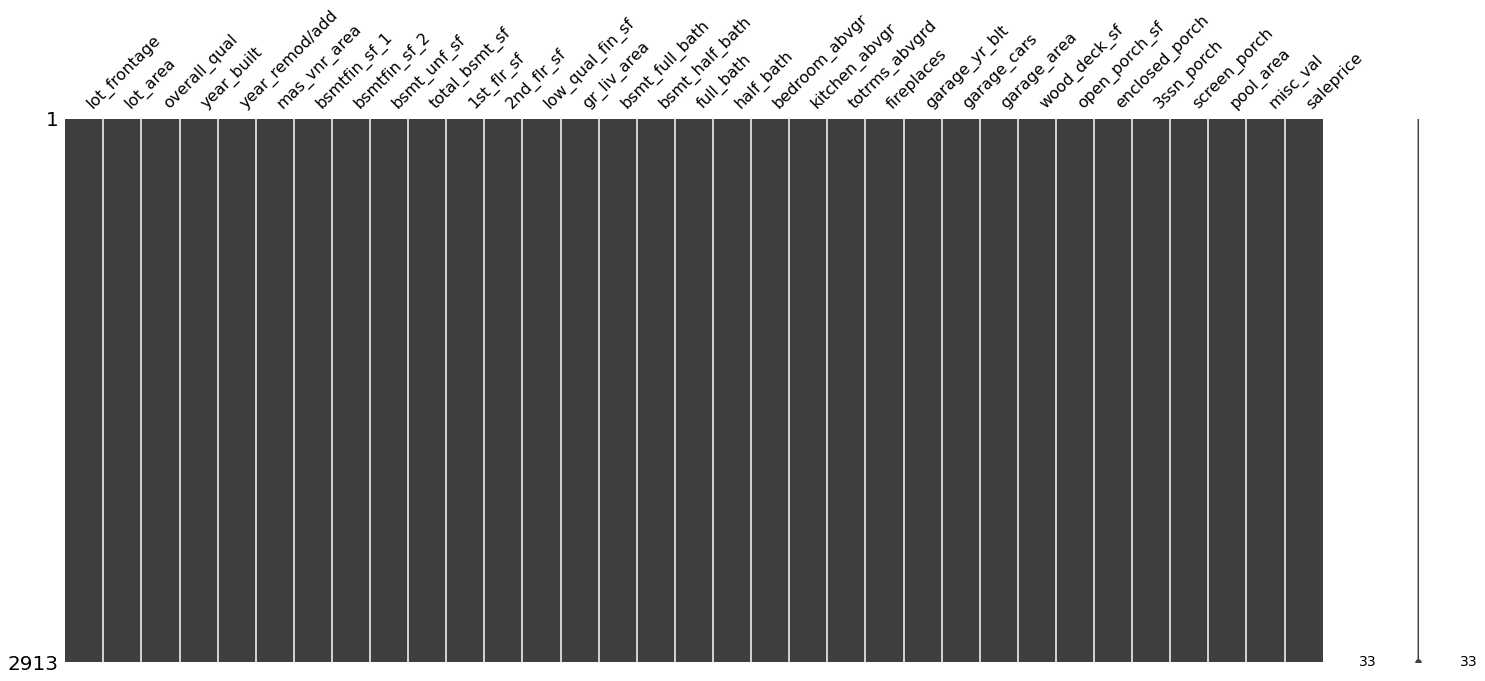

In [28]:
msno.matrix(df.select_dtypes(exclude='object'))

In [29]:
#list of features with missng values
listmiss = df.columns[df.isnull().any()].tolist()
listmiss
#df.columns[df.isnull().any()] #does the same 
#if empty..means no more 

[]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2913 non-null   object 
 1   ms_zoning        2913 non-null   object 
 2   lot_frontage     2913 non-null   float64
 3   lot_area         2913 non-null   int64  
 4   street           2913 non-null   object 
 5   alley            2913 non-null   object 
 6   lot_shape        2913 non-null   object 
 7   land_contour     2913 non-null   object 
 8   lot_config       2913 non-null   object 
 9   land_slope       2913 non-null   object 
 10  neighborhood     2913 non-null   object 
 11  condition_1      2913 non-null   object 
 12  condition_2      2913 non-null   object 
 13  bldg_type        2913 non-null   object 
 14  house_style      2913 non-null   object 
 15  overall_qual     2913 non-null   int64  
 16  overall_cond     2913 non-null   object 
 17  year_built    

# save the files

In [31]:
df.to_csv("cs1_part2_res.csv",index=False)